In [1]:
#Q1 Perform the necessary pre-processing.
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
from sklearn.preprocessing import LabelEncoder

In [2]:
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam,RMSprop
from keras import backend as k
import pandas as pd

In [3]:
failure=pd.read_csv("C:\\Users\\HARIHARAN GUNABALAN\\OneDrive\\Desktop\\SRET\\AI TERM 4\\DEEP LEARNING\\CA 1\\heart_failure_clinical_records_dataset.csv")
failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
f=failure

In [5]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
f.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
f[['age','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','smoking','DEATH_EVENT']]=f[['age','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','smoking','DEATH_EVENT']].apply(LabelEncoder().fit_transform)

In [9]:
f.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,34,0,144,0,3,1,265000.00,1.9,130,1,0,4,1
1,15,0,207,0,7,0,263358.03,1.1,136,1,0,6,1
2,26,0,66,0,3,0,162000.00,1.3,129,1,1,7,1
3,10,1,44,0,3,0,210000.00,1.9,137,1,0,7,1
4,26,1,74,1,3,0,327000.00,2.7,116,0,0,8,1


In [10]:
f = f.drop(['creatinine_phosphokinase', 'ejection_fraction', 'smoking', 'diabetes'], axis = 1)

In [11]:
f.head()

,age,anaemia,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
0,34,0,1,265000.00,1.9,130,1,4,1
1,15,0,0,263358.03,1.1,136,1,6,1
2,26,0,0,162000.00,1.3,129,1,7,1
3,10,1,0,210000.00,1.9,137,1,7,1
4,26,1,0,327000.00,2.7,116,0,8,1


In [12]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    int64  
 1   anaemia              299 non-null    int64  
 2   high_blood_pressure  299 non-null    int64  
 3   platelets            299 non-null    float64
 4   serum_creatinine     299 non-null    float64
 5   serum_sodium         299 non-null    int64  
 6   sex                  299 non-null    int64  
 7   time                 299 non-null    int64  
 8   DEATH_EVENT          299 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.1 KB


In [13]:
f.isnull().sum()

age                    0
anaemia                0
high_blood_pressure    0
platelets              0
serum_creatinine       0
serum_sodium           0
sex                    0
time                   0
DEATH_EVENT            0
dtype: int64

In [14]:
column = f.columns[f.isnull().any()]
column

Index([], dtype='object')

In [15]:
#filling NA values
for column in column:
    f[column].fillna(f[column].mean(), inplace=True)

In [16]:
f.isnull().sum()

age                    0
anaemia                0
high_blood_pressure    0
platelets              0
serum_creatinine       0
serum_sodium           0
sex                    0
time                   0
DEATH_EVENT            0
dtype: int64

In [17]:
x = f.drop(["DEATH_EVENT"], axis=1)
y = f["DEATH_EVENT"]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [19]:
input_size = x_train.shape[1]
input_size

8

Q2 Build an ANN model. Plot accuracy and loss for training and validation dataset.

In [20]:
#Q2 Build an ANN model. Plot accuracy and loss for training and validation dataset.
model1 = Sequential()
model1.add(Dense(units = 32, activation = 'relu', input_dim = input_size ))
model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dropout(0.35))
model1.add(Dense(units = 16, activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units = 8, activation = 'relu'))
model1.add(Dropout(0.45))
model1.add(Dense(units = 1, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0

In [21]:
model1.compile(loss = 'binary_crossentropy',optimizer="adam", metrics = ['accuracy'])

In [22]:
history1 = model1.fit(x_train, y_train, batch_size = 16, epochs = 20, validation_split=0.2)

Epoch 1/20
12/12 [==============================] - 1s 25ms/step - loss: 16796.1074 - accuracy: 0.3298 - val_loss: 4936.3477 - val_accuracy: 0.3750
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 9956.2764 - accuracy: 0.3298 - val_loss: 2263.0439 - val_accuracy: 0.3750
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 5713.6660 - accuracy: 0.3298 - val_loss: 948.0088 - val_accuracy: 0.3750
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 3086.0134 - accuracy: 0.3298 - val_loss: 672.7144 - val_accuracy: 0.3750
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 3039.3535 - accuracy: 0.3298 - val_loss: 7.7880 - val_accuracy: 0.3750
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 2044.5105 - accuracy: 0.3298 - val_loss: 174.2517 - val_accuracy: 0.3750
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 1915.6993 - accuracy: 0.3298 - val_loss: 120.8028 - val_

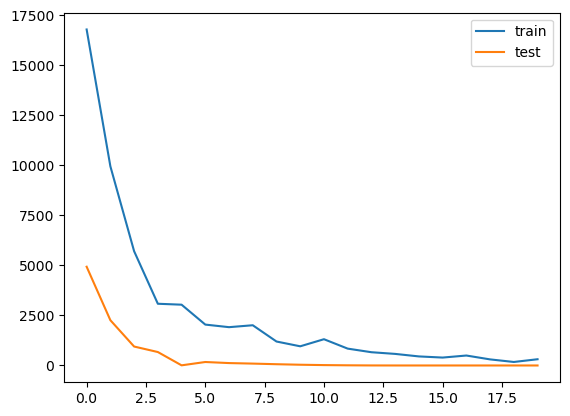

In [23]:
plt.plot(history1.history['loss'],label='train')
plt.plot(history1.history['val_loss'],label='test')
plt.legend()
plt.show()

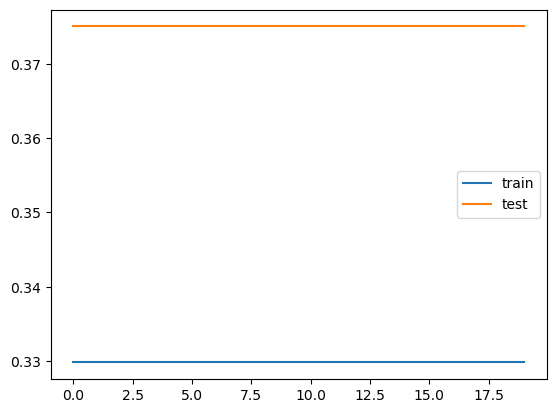

In [24]:
plt.plot(history1.history['accuracy'],label='train')
plt.plot(history1.history['val_accuracy'],label='test')
plt.legend()
plt.show()

Q3 Implement two regularization techniques and analyze the performance before and after
regularization

In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [26]:
#regularisation l1
model2=Sequential()
model2.add(Dense(units=32,input_dim=input_size))
model2.add(Activation('relu'))

model2.add(Dense(units=32,kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(Activation('relu'))
model1.add(Dropout(0.35))
model2.add(Dense(1))
model2.add(Activation('softmax'))
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                288       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-traina

In [27]:
history2 = model2.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split=0.2)

Epoch 1/10
6/6 [==============================] - 1s 31ms/step - loss: 7745.4287 - accuracy: 0.3298 - val_loss: 4975.6230 - val_accuracy: 0.3750
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 1339.1328 - accuracy: 0.3298 - val_loss: 1159.2234 - val_accuracy: 0.3750
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 754.3519 - accuracy: 0.3298 - val_loss: 1000.9349 - val_accuracy: 0.3750
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 481.6906 - accuracy: 0.3298 - val_loss: 310.7209 - val_accuracy: 0.3750
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 314.0696 - accuracy: 0.3298 - val_loss: 386.8405 - val_accuracy: 0.3750
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 301.0167 - accuracy: 0.3298 - val_loss: 430.6383 - val_accuracy: 0.3750
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 325.1979 - accuracy: 0.3298 - val_loss: 167.5121 - val_accuracy: 0.3750


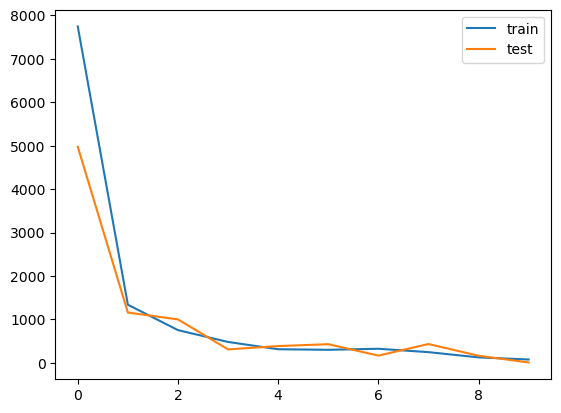

In [28]:
plt.plot(history2.history['loss'],label='train')
plt.plot(history2.history['val_loss'],label='test')
plt.legend()
plt.show()

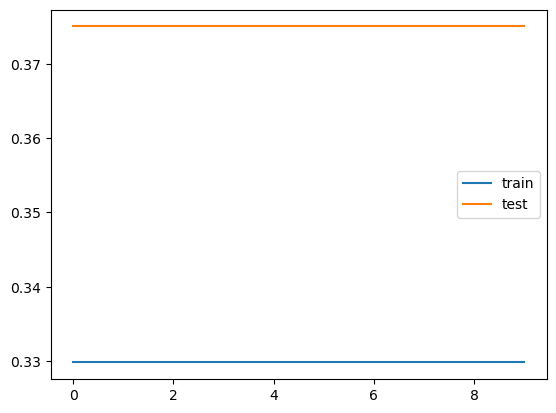

In [29]:
plt.plot(history2.history['accuracy'],label='train')
plt.plot(history2.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [30]:
#early stopping
from keras.callbacks import EarlyStopping

In [31]:
model3=Sequential()
model3.add(Dense(units=32,input_dim=input_size))
model3.add(Activation('relu'))

model3.add(Dense(units=32))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1))
model3.add(Activation('softmax'))

In [32]:
model3.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [33]:
e=EarlyStopping(monitor='val_loss',mode='min',verbose=1)

In [34]:
history3=model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=300,verbose=0,callbacks=[e])

Epoch 2: early stopping


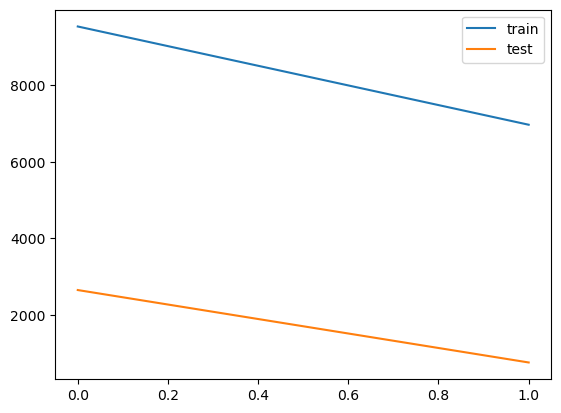

In [35]:
plt.plot(history3.history['loss'],label='train')
plt.plot(history3.history['val_loss'],label='test')
plt.legend()
plt.show()

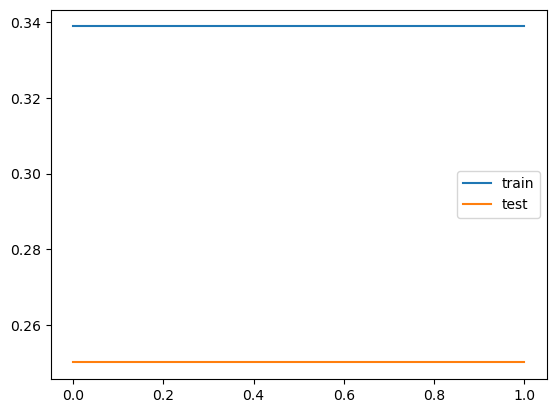

In [36]:
plt.plot(history3.history['accuracy'],label='train')
plt.plot(history3.history['val_accuracy'],label='test')
plt.legend()
plt.show()